###  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

In [44]:
# 고객 데이터프레임
np.random.seed(0)
cusno = np.arange(1001,2001)
gender = np.random.randint(0,2,size=1000)
age = np.random.randint(10,81,size=1000)
region = np.random.randint(1,11,size=1000)

cus = pd.DataFrame({'cusno':cusno,'gender':gender,'age':age,'region':region})

# 거래 데이터프레임
trans_id = random.sample(list(range(10001,50000)), 10000)
cusno = np.random.randint(1001,2001, size=10000)
date = pd.date_range(start='2020-01-01', end='2021-12-31', periods=10000, normalize=True)
day = date.day_name
product_20 = np.random.choice([10,20,30], 10000) # 10:고가, 20:중가, 30:저가
product_21 = np.random.choice([10,20,30], 10000)
price_20 = np.random.uniform(1000,50000,10000).round()
price_21 = np.random.uniform(1000,50000,10000).round()
quantity_20 = np.random.randint(1,101, size=10000)
quantity_21 = np.random.randint(1,101, size=10000)
time_20 = np.random.randint(1,25, size=10000)
time_21 = np.random.randint(1,25, size=10000)
amount_20 = price_20 * quantity_21
amount_21 = price_21 * quantity_21

trans = pd.DataFrame({
    'trans_id':trans_id, 'cusno':cusno, 'date':date, 'day':day(), 'product_20':product_20,
    'product_21':product_21, 'price_20':price_20, 'price_21':price_21,
    'quantity_20':quantity_20, 'quantity_21':quantity_21,
    'time_20':time_20, 'time_21':time_21, 'amount_20':amount_20, 'amount_21':amount_21})

# price값에 따라 product 값 변경 필요
# 1000원 ~ 50000원이니까 1000원~15000원 30, 15001원~35000원 중가, 35001원~50000원 10 설정
def price_readjust(x):
  if 1000 <= x <= 15000:
    return 30
  elif 15000 < x <= 35000:
    return 20
  else:
    return 10

trans['product_20'] = trans['price_20'].apply(price_readjust)
trans['product_21'] = trans['price_21'].apply(price_readjust)

# cus와 trans merge
df = pd.merge(cus, trans, on='cusno', how='outer')

# 월, 분기, 연도별 데이터셋
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

# 연령대 카테고리 생성
bins = [10, 19, 29, 39, 49, 59, 69, 80]
labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

In [45]:
# 인사이트 1. 연령별 매출액 조정
  # 10대 그룹 -70% 조정
  # 70대 그룹 -40% 조정
  # 30-40대 +20% 조정

teens = df['age_group'] == '10s'
young_adualts = df['age_group'].isin(['30s', '40s'])
seniors = df['age_group'] == '70s'

df.loc[teens, ['quantity_20', 'quantity_21']] *= 0.3
df.loc[young_adualts, ['quantity_20', 'quantity_21']] *= 1.2
df.loc[seniors, ['quantity_20', 'quantity_21']] *= 0.6

def update_amount(x):
  # amount 업데이트
  x['amount_20'] = x['price_20'] * x['quantity_20']
  x['amount_21'] = x['price_21'] * x['quantity_21']

  return x

df.apply(update_amount, axis=1)

,cusno,gender,age,region,trans_id,date,day,product_20,product_21,price_20,...,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,year,month,quarter,age_group
0,1001,0,49,2,13348,2020-01-30 03:07:04.482448244,Thursday,20,10,19720.0,...,75.0,96.0,23,12,1479000.0,4639200.0,2020,1,1,50s
1,1001,0,49,2,48119,2020-05-24 02:47:37.965796580,Sunday,20,10,31702.0,...,89.0,81.0,10,11,2821478.0,3481137.0,2020,5,2,50s
2,1001,0,49,2,42078,2020-08-05 04:43:16.579657964,Wednesday,20,30,23162.0,...,25.0,31.0,22,4,579050.0,447826.0,2020,8,3,50s
3,1001,0,49,2,18709,2020-10-13 11:32:07.992799280,Tuesday,10,20,49701.0,...,79.0,49.0,3,10,3926379.0,1593088.0,2020,10,4,50s
4,1001,0,49,2,27993,2020-11-16 12:02:57.137713772,Monday,10,20,41243.0,...,55.0,50.0,8,6,2268365.0,1117950.0,2020,11,4,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2000,0,14,5,38656,2020-07-31 02:04:08.424842484,Friday,20,30,25568.0,...,3.0,15.9,7,16,76704.0,218338.8,2020,7,3,10s
9996,2000,0,14,5,26227,2020-12-12 04:48:53.573357336,Saturday,30,30,3820.0,...,23.7,5.7,14,20,90534.0,28756.5,2020,12,4,10s
9997,2000,0,14,5,27762,2021-03-07 02:35:40.774077408,Sunday,20,10,31510.0,...,4.5,1.5,15,23,141795.0,61624.5,2021,3,1,10s
9998,2000,0,14,5,31419,2021-05-03 10:03:07.938793880,Monday,20,10,21637.0,...,3.6,7.2,9,14,77893.2,307756.8,2021,5,2,10s


In [46]:
# 인사이트 2. 연령대별 구매한 product 선호도 조정
# 10~20대 : 저가 선호, 30대~50대 : 고가 선호, 60~70대 : 중가 선호

cusno = df['cusno'] <= 1600
youngs = df['age_group'].isin(['10s', '20s']) & cusno
ya_cusno = young_adualts & cusno
adualts = df['age_group'].isin(['50s', '60s', '70s']) & cusno

df.loc[youngs, ['product_20', 'product_21']] = 30
df.loc[ya_cusno, ['product_20', 'product_21']] = 10
df.loc[adualts, ['product_20', 'product_21']] = 20

In [47]:
# 인사이트 3. 특정 분기 상품 매출 변동 조정
#   - 1분기 고가 상품 매출 down 30%

cond1 = (df['quarter'] == 1) & (df['product_20'] == 10)
cond2 = (df['quarter'] == 1) & (df['product_21'] == 10)

df.loc[cond1, 'quantity_20'] *= 0.7
df.loc[cond2, 'quantity_21'] *= 0.7
df.loc[cond1, 'amount_20'] = df.loc[cond1, 'price_20'] * df.loc[cond1, 'quantity_20']
df.loc[cond2, 'amount_21'] = df.loc[cond2, 'price_20'] * df.loc[cond2, 'quantity_20']


In [48]:
# 인사이트 4. 지역별 연령 분포 조정 : 10,40대 1지역 거주 70대 2지역 거주 다수
family = df['age_group'].isin(['10s', '40s'])
df.loc[family, 'region'] = 1
df.loc[seniors, 'region'] = 2

In [49]:
# 인사이트 5. 전체적으로 price_20 대비 price_21 가격 상승, 매출 하락

# 가격 조정
df['price_21'] *= 1.1

# 21년도 판매량 & 매출액 조정
df['quantity_21'] *= 0.7
df['amount_21'] = df['price_21'] * df['quantity_21']

In [ ]:
df.head()

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

In [ ]:
# 고객 연령 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(cus['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# 인사이트 1 연령별 매출액 탐색

# 2020년/2021년 연령대 별 총 매출액 데이터
amount_20 = df.groupby('age_group')['amount_20'].sum().reset_index()
amount_21 = df.groupby('age_group')['amount_21'].sum().reset_index()

# Amount & Price 그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 2020년 매출액 그래프
ax1.bar(amount_20['age_group'], amount_20['amount_20'], color='skyblue')
ax1.set_title('2020 Amount by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Amount')
ax1.set_xticklabels(amount_20['age_group'])

# 2021년 매출액 그래프
ax2.bar(amount_21['age_group'], amount_21['amount_21'], color='lightcoral')
ax2.set_title('2021 Amount by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Total Amount')
ax2.set_xticklabels(amount_21['age_group'])

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

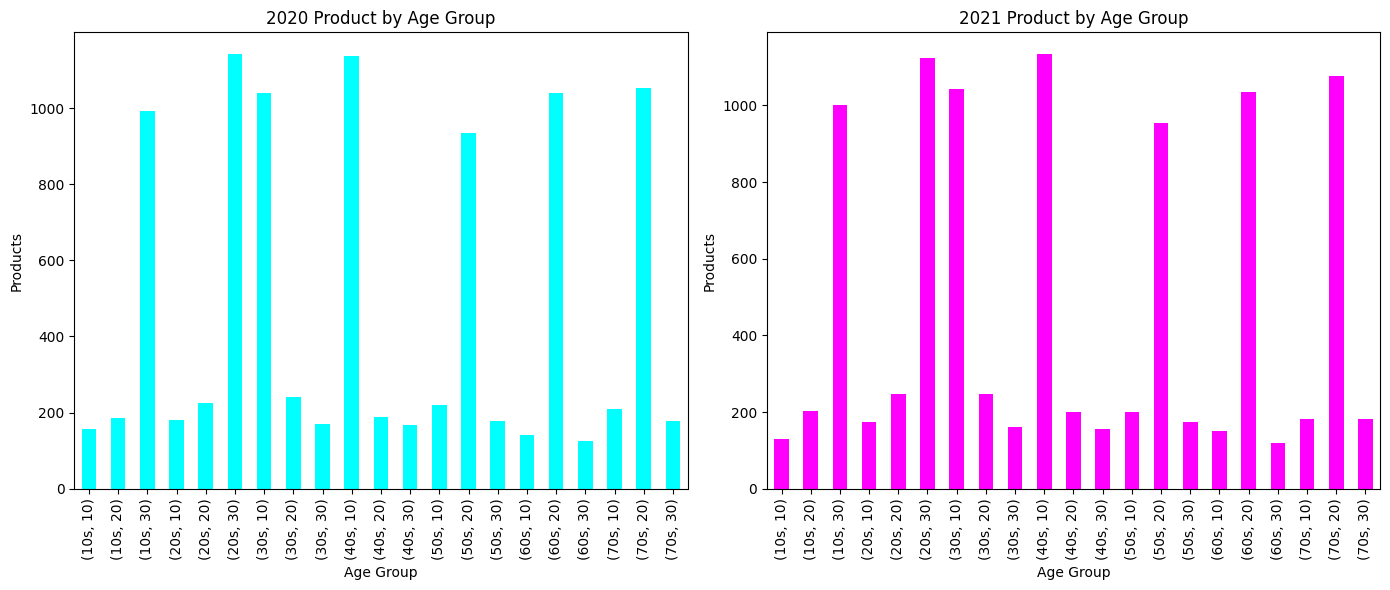

In [53]:
# 인사이트 2 연령대별 구매한 product 선호도 탐색
# 2020년/2021년 연령대 별 구매한 product 별 count

product20 = df.groupby(['age_group', 'product_20']).product_20.count()
product21 = df.groupby(['age_group', 'product_21']).product_21.count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 2020년 연령별 상품 선호
product20.plot(kind='bar', ax=ax1, colormap='cool')
ax1.set_title('2020 Product by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Products')

# 2021년 연령별 상품 선호
product21.plot(kind='bar', ax=ax2, colormap='spring')
ax2.set_title('2021 Product by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Products')

plt.tight_layout()
plt.show()

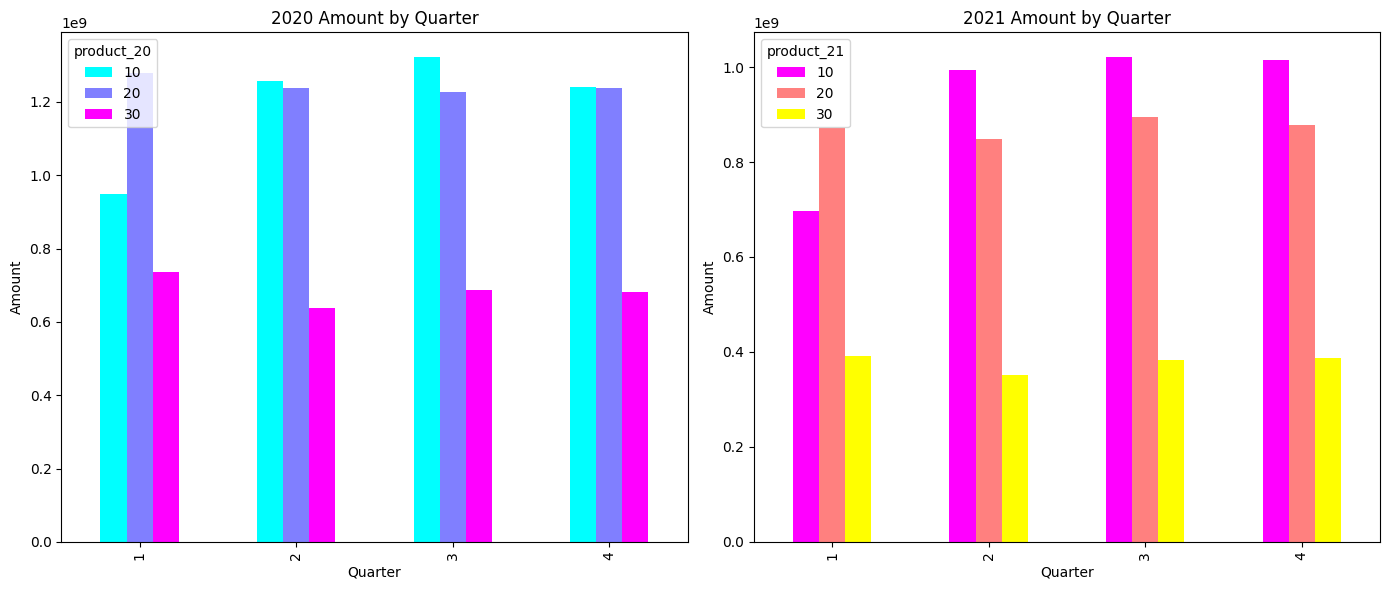

In [54]:
# 인사이트 3 분기별 상품별 매출액 탐색

# 인덱스: product_20, product_21. columns: quarter value는 amount_20, amount_21

amount20 = df.groupby(['quarter', 'product_20'])['amount_20'].sum().reset_index()
amount21 = df.groupby(['quarter', 'product_21'])['amount_21'].sum().reset_index()

pt1 = amount20.pivot_table(index='quarter', columns='product_20', values='amount_20', aggfunc='sum')
pt2 = amount21.pivot_table(index='quarter', columns='product_21', values='amount_21', aggfunc='sum')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 2020년 분기별 상품별 매출액
pt1.plot(kind='bar', ax=ax1, colormap='cool')
ax1.set_title('2020 Amount by Quarter')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Amount')

# 2021년 분기별 상품별 매출액
pt2.plot(kind='bar', ax=ax2, colormap='spring')
ax2.set_title('2021 Amount by Quarter')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Amount')

plt.tight_layout()
plt.show()

In [ ]:
# 인사이트 4. 지역별 연령 분포 조정 : 10,40대 1지역 거주 70대 2지역 거주 다수
family = df['age_group'].isin(['10s', '40s'])
df.loc[family, 'region'] = 1
df.loc[seniors, 'region'] = 2

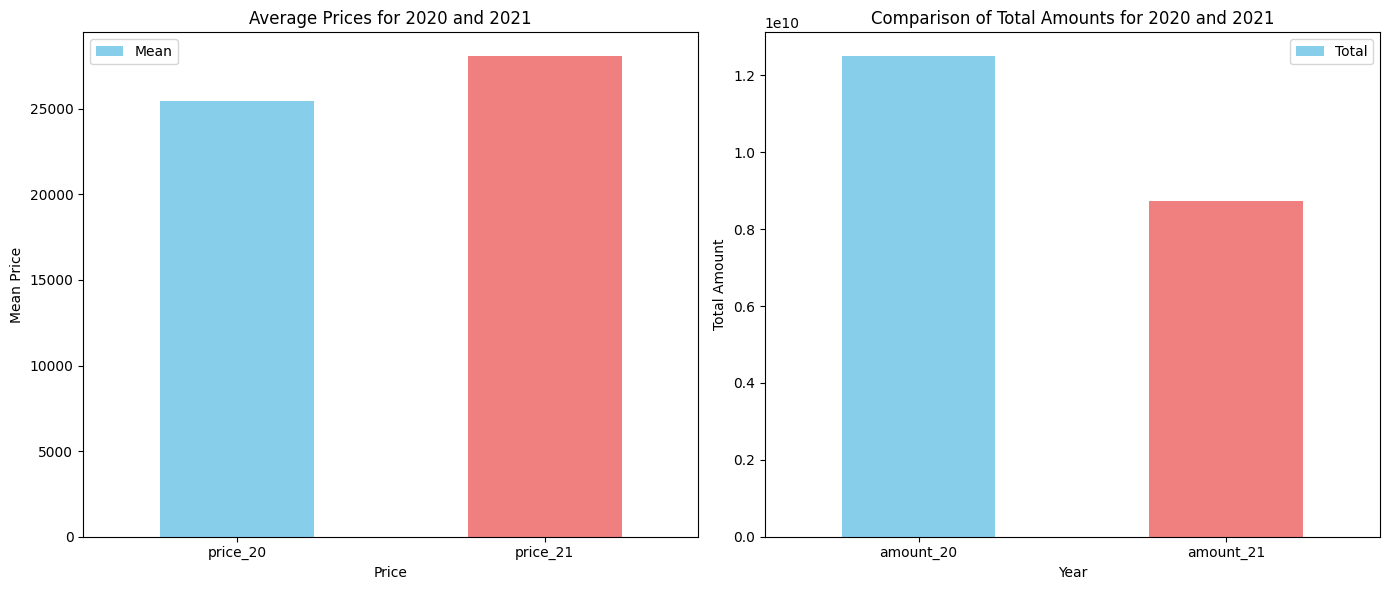

In [55]:
# 인사이트 5 탐색

# Amount 20 / 21 데이터
sales_year = df[['amount_20', 'amount_21']].sum().reset_index()
sales_year.columns = ['Year', 'Total']

# Price 20 / 21 데이터
price_year = df[['price_20', 'price_21']].mean().reset_index()
price_year.columns = ['Price', 'Mean']

# Amount & Price 그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

price_year.plot(kind='bar', x='Price', y='Mean', color=['skyblue', 'lightcoral'], ax=ax1)
ax1.set_title('Average Prices for 2020 and 2021')
ax1.set_xlabel('Price')
ax1.set_ylabel('Mean Price')
ax1.set_xticklabels(price_year['Price'], rotation=0)

sales_year.plot(kind='bar', x='Year', y='Total', color=['skyblue', 'lightcoral'], ax=ax2)
ax2.set_title('Comparison of Total Amounts for 2020 and 2021')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Amount')
ax2.set_xticklabels(sales_year['Year'], rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
# 제품 선호도 조사
# 연령대별, 지역별

pivot_table = pd.pivot_table(df, values=['quantity_20', 'quantity_21'], index='region', columns=['product_20', 'product_21'], aggfunc='sum')
print(pivot_table)
